# 01线性可分SVM
目的：观察C取值对于决策边界的影响,
数据集：ex6data1.mat

In [130]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [131]:
data_path = '/home/alex/test/NG_exercise/ex6_Support_Vector_Machine'
data = sio.loadmat(data_path + '/ex6data1.mat')

In [132]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [133]:
X, y = data['X'], data['y']
(X.shape,y.shape)

((51, 2), (51, 1))

In [134]:
print(X[0:1,:])
print(y[ :1,:])

[[1.9643 4.5957]]
[[1]]


In [135]:
def plot_data():
    plt.scatter(X[:,0], X[:,1], c=y.flatten(), marker='*', cmap='rainbow')
    plt.xlabel('X1')
    plt.ylabel('y1')

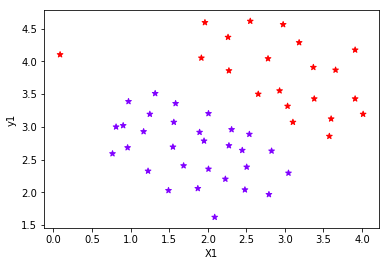

In [136]:
plot_data()

In [137]:
#线性SVC
svc1 = SVC(C=1, kernel='linear')
#y需要传递数组，注意是（51，）
svc1.fit(X, y.flatten())

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [138]:
svc1.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [139]:
svc1.score(X, y.flatten())

0.9803921568627451

In [140]:
def plot_boundary(model):
    x_min, x_max = -0.5, 4.5
    y_min, y_max = 1.3, 5
    xx, yy = np.meshgrid(np.linspace(x_min,x_max, 500),
                        np.linspace(y_min,y_max,500))
    z = model.predict(np.c_[xx.flatten(), yy.flatten()])
    zz = z.reshape(xx.shape)
    plt.contour(xx,yy,zz)

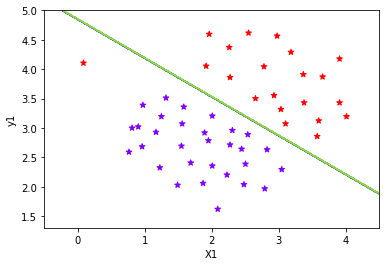

In [141]:
plot_boundary(svc1)
plot_data()

In [142]:
svc100 = SVC(C=100, kernel='linear')
svc100.fit(X, y.flatten())

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [143]:
svc100.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1], dtype=uint8)

In [144]:
svc100.score(X, y.flatten())

1.0

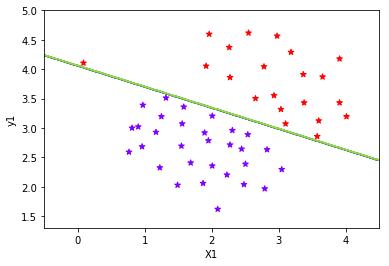

In [145]:
plot_boundary(svc100)
plot_data()

# 02线性不可分SVM
用高斯壳函数解决线性不可分问题，并观察高斯壳函数中gamma取值对于模型复杂度的影响
。数据集：ex6data2.mat

In [168]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [169]:
data_path = '/home/alex/test/NG_exercise/ex6_Support_Vector_Machine'
data_path += '/ex6data2.mat'
data = sio.loadmat(data_path)

In [170]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [171]:
X, y = data['X'], data['y']

In [172]:
print(X[0,:])
print(y[0,:])

[0.107143 0.60307 ]
[1]


In [173]:
(X.shape, y.shape)

((863, 2), (863, 1))

In [174]:
def plot_data():
    plt.scatter(X[:,0], X[:,1], c=y.flatten(), cmap='rainbow')
    plt.xlabel('X1')
    plt.xlabel('X2')

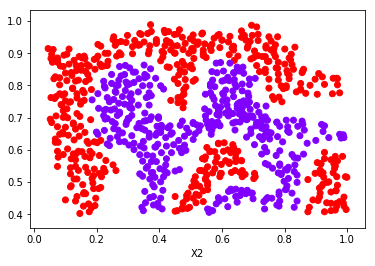

In [175]:
plot_data()

In [176]:
##rbf#径像核函数/高斯核函数
#gamma是sigma的倒数
svc1 = SVC(C=1, kernel='rbf', gamma=1000)
svc1.fit(X, y.flatten())

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1000, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [177]:
svc1.score(X, y.flatten())

1.0

In [178]:
def plot_boundary(model):
    x_min, x_max = 0, 1
    y_min, y_max = 0.4, 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    z = model.predict(np.c_[xx.flatten(), yy.flatten()])
    
    zz = z.reshape(xx.shape)
    plt.contour(xx, yy, zz)

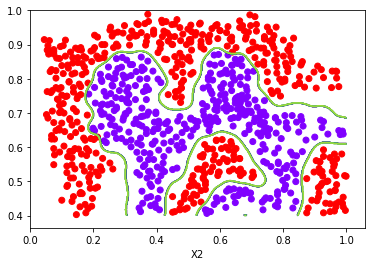

In [179]:
plot_boundary(svc1)
plot_data()

# 03寻找最优参数C和gamma
数据集：ex6data3.mat

In [180]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [182]:
data_path = '/home/alex/test/NG_exercise/ex6_Support_Vector_Machine'
data_path += '/ex6data3.mat'
data = sio.loadmat(data_path)

In [195]:
#以前一直是用训练集来验证训练效果
X, y = data['X'], data['y']
X_cv, y_cv = data['Xval'], data['yval']

In [196]:
print(X[0,:])
print(y[0,:])
(X.shape, y.shape)

[-0.158986  0.423977]
[1]


((211, 2), (211, 1))

In [197]:
(X_cv.shape, y_cv.shape)

((200, 2), (200, 1))

In [228]:
def plot_data():
    plt.scatter(X[:,0], X[:,1], c=y.flatten(), cmap='rainbow')
    plt.xlabel('X1')
    plt.xlabel('X2')

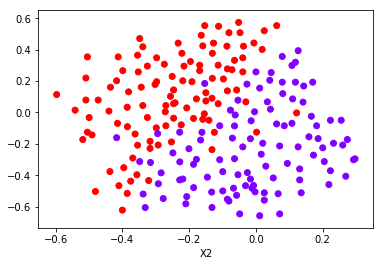

In [229]:
plot_data()

In [230]:
C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100,]#9
Gammas =  [0.01, 0.03, 0.1, 0.3, 1 ,3, 10, 30, 100]  #9

In [231]:
best_score = 0
best_params = (0,0)

for c in C_values:
    for gamma in Gammas:
        svc = SVC(C=c, kernel='rbf', gamma=gamma)
        svc.fit(X, y.flatten())
        score = svc.score(X_cv, y_cv.flatten())
        if score > best_score:
            best_score = score
            best_params = (c, gamma)

print('best_score={0}, best C & gamma={1}'
      .format(best_score, best_params))

best_score=0.965, best C & gamma=(0.3, 100)


In [232]:
svc2 = SVC(C=0.3, kernel='rbf', gamma=100)
svc2.fit(X, y.flatten())

SVC(C=0.3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [233]:
def plot_boundary(model):
    x_min, x_max = -0.8, 0.4
    y_min, y_max = -0.9, 0.8
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    z = model.predict(np.c_[xx.flatten(), yy.flatten()])
    print(z.shape)
    zz = z.reshape(xx.shape)
    plt.contour(xx, yy, zz)

(250000,)


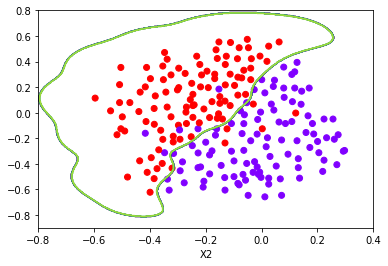

In [234]:
plot_boundary(svc2)
plot_data()

# 04垃圾邮件分类

In [238]:
data_path = '/home/alex/test/NG_exercise/ex6_Support_Vector_Machine'
data_path += '/emailSample1.txt'
with open(data_path, 'r') as f:
    sample_email = f.read()
    print(sample_email)

> Anyone knows how much it costs to host a web portal ?
>
Well, it depends on how many visitors you're expecting.
This can be anywhere from less than 10 bucks a month to a couple of $100. 
You should checkout http://www.rackspace.com/ or perhaps Amazon EC2 
if youre running something big..

To unsubscribe yourself from this mailing list, send an email to:
groupname-unsubscribe@egroups.com




### 对邮件预处理

In [430]:
'''
预处理主要包括以下8个部分：
  1. 将大小写统一成小写字母；
  2. 移除所有HTML标签，只保留内容。
  3. 将所有的网址替换为字符串 “httpaddr”.
  4. 将所有的邮箱地址替换为 “emailaddr”
  5. 将所有dollar符号($)替换为“dollar”.
  6. 将所有数字替换为“number”
  7. 将所有单词还原为词源，词干提取
  8. 移除所有非文字类型
  9.去除空字符串‘’
'''

import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from sklearn.svm import SVC
import nltk.stem as ns
import pandas as pd
import re

In [472]:
def preprocessing(email):
    #1. 小写
    email = email.lower()
    #2. 去除html标签
    email = re.sub('<[^<>]>', '', email)
    #3. 将网址替换为字符串 “httpaddr”.
    email = re.sub('(http|https)://[^\s]*', 'httpaddr', email)
    #4. 将邮箱地址替换为 “emailaddr”
    email = re.sub('[^\s]+@[^\s]+.\s+', 'emailaddr', email)
    #5. 所有的"$"替换成 ”dollar"
    email = re.sub('[\$]+', 'dollar', email)
    #6. 匹配所有的数字，将数字替换为“number”
    email = re.sub('[0-9]+', 'number', email) # 匹配一个数字， 相当于 [0-9]，+ 匹配1到多次
    #7. 词干提取
    tokens = re.split('[ \@\$\/\#\.\-\:\&\*\+\=\[\]\?\!\(\)\{\}\,\'\"\>\_\<\;\%]', email)
#     print(tokens)
    tokenlist=[]
    
    #英语词源
    s = ns.SnowballStemmer('english')
    
    for token in tokens:
        #8. 移除非文字类型； 
            #[^a]#是匹配非a
        email = re.sub('[^a-zA-Z0-9]', '', email)
        #词源
        stemmed = s.stem(token)
        print("---:", stemmed)

        # 9.去除空字符串‘’
        if not len(token): 
            continue
        tokenlist.append(stemmed)  
        
    return tokenlist
    
        

In [432]:
email = preprocessing(sample_email)

['', '', 'anyone', 'knows', 'how', 'much', 'it', 'costs', 'to', 'host', 'a', 'web', 'portal', '', '\n', '\nwell', '', 'it', 'depends', 'on', 'how', 'many', 'visitors', 'you', 're', 'expecting', '\nthis', 'can', 'be', 'anywhere', 'from', 'less', 'than', 'number', 'bucks', 'a', 'month', 'to', 'a', 'couple', 'of', 'dollarnumber', '', '\nyou', 'should', 'checkout', 'httpaddr', 'or', 'perhaps', 'amazon', 'ecnumber', '\nif', 'youre', 'running', 'something', 'big', '', '\n\nto', 'unsubscribe', 'yourself', 'from', 'this', 'mailing', 'list', '', 'send', 'an', 'email', 'to', '\nemailaddr']
---: 
---: 
---: anyon
---: know
---: how
---: much
---: it
---: cost
---: to
---: host
---: a
---: web
---: portal
---: 
---: 

---: 
well
---: 
---: it
---: depend
---: on
---: how
---: mani
---: visitor
---: you
---: re
---: expect
---: 
this
---: can
---: be
---: anywher
---: from
---: less
---: than
---: number
---: buck
---: a
---: month
---: to
---: a
---: coupl
---: of
---: dollarnumb
---: 
---: 
you
-

In [473]:
def email2VocabIndices(email, vocab):
    """依据vocab.txt提取存在单词的索引"""
    token = preprocessing(email)
    print(token)
    index = [i for i in range(len(token)) if token[i] in vocab]
    return index

In [474]:
def email2FeatureVector(email):
    """
    将email转化为词向量，n是vocab的长度。
    存在单词的相应位置的值置为1，否则为0
    """
    data_path = '/home/alex/test/NG_exercise/ex6_Support_Vector_Machine'
    data_path += '/vocab.txt'    
    df = pd.read_table(data_path, names=['words'])
    
    vocab = df.values
#     print('vocab', len(vocab))
    vector = np.zeros(len(vocab)) #(1899,)
#     print('vector', vector)
    vocab_indices = email2VocabIndices(email, vocab)
#     print(vocab_indices)
    for i in vocab_indices:
        vector[i] = 1
    return vector
    

In [475]:
vector = email2FeatureVector(sample_email)

---: 
---: 
---: anyon
---: know
---: how
---: much
---: it
---: cost
---: to
---: host
---: a
---: web
---: portal
---: 
---: 

---: 
well
---: 
---: it
---: depend
---: on
---: how
---: mani
---: visitor
---: you
---: re
---: expect
---: 
this
---: can
---: be
---: anywher
---: from
---: less
---: than
---: number
---: buck
---: a
---: month
---: to
---: a
---: coupl
---: of
---: dollarnumb
---: 
---: 
you
---: should
---: checkout
---: httpaddr
---: or
---: perhap
---: amazon
---: ecnumb
---: 
if
---: your
---: run
---: someth
---: big
---: 
---: 

to
---: unsubscrib
---: yourself
---: from
---: this
---: mail
---: list
---: 
---: send
---: an
---: email
---: to
---: 
emailaddr
['anyon', 'know', 'how', 'much', 'it', 'cost', 'to', 'host', 'a', 'web', 'portal', '\n', '\nwell', 'it', 'depend', 'on', 'how', 'mani', 'visitor', 'you', 're', 'expect', '\nthis', 'can', 'be', 'anywher', 'from', 'less', 'than', 'number', 'buck', 'a', 'month', 'to', 'a', 'coupl', 'of', 'dollarnumb', '\nyou', '

In [476]:
print(vector)

[1. 1. 1. ... 0. 0. 0.]


In [465]:
vector.shape

(1898,)

# 05判断邮件是否是垃圾邮件

In [477]:
import scipy.io as sio
from sklearn.svm import SVC

In [491]:
#training data
data_path = '/home/alex/test/NG_exercise/ex6_Support_Vector_Machine'
data_path += '/spamTrain.mat'
data = sio.loadmat(data_path)
X, y = data['X'], data['y']

# Testing data
data_path = '/home/alex/test/NG_exercise/ex6_Support_Vector_Machine'
data_path += '/spamTest.mat'
data2 = sio.loadmat(data_path)
X_test, y_test = data2['Xtest'], data2['ytest']

In [495]:
#1899个特征，和vocab个数对应
(X.shape, y.shape)

((4000, 1899), (4000, 1))

In [494]:
X[0:1,:]

array([[0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [500]:
y[0:1,:]

array([[1]], dtype=uint8)

In [502]:
C_values = [0.01, 0.03, 0.1, 0.3, 1, 10, 30, 100, 300,]

best_score = 0
best_param = 0

for c in C_values:
    svc = SVC(C=c,kernel='linear')
    svc.fit(X, y.flatten())
    score= svc.score(Xtest, ytest.flatten())
    if score > best_score:
        best_score = score
        best_param = c
        
print(best_score,best_param)

0.99 0.03


In [505]:
#训练集和测试集的准确度分数
svc = SVC(C=best_score, kernel='linear')
svc.fit(X, y.flatten())
score_train = svc.score(X, y.flatten())
score_test = svc.score(X_test, y_test.flatten())

In [506]:
(score_train, score_test)

(0.99975, 0.978)